In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
#sns.set()
plt.style.use('ggplot')

In [2]:
def calculate_f1(precision, recall):
    f1_score = (2 * precision * recall) / (precision + recall)
    return round(f1_score, 2)

In [3]:
def process_result_file(filename_result):
    # Open the text file
    meta = filename_result.split('_')
    fold = meta[1]
    iou_score = meta[4].split('.t')[0]
    with open(filename_result, 'r') as file:
        # Read the lines
        lines = file.readlines()

        # Iterate through the lines
        for line in lines:
            # Check if the line contains the values you want
            if "all" in line:
                values_line = line.strip()  # Remove leading/trailing whitespaces
                break  # Exit the loop once the line is found

    
    valores = values_line.split(' ')
    v = [value for value in valores if value != '']
    # calculate and format response
    f1_score_value = 0
    try:
        f1_score_value = calculate_f1(float(v[3]), float(v[4]))
    except:
        print(f"Exception F1 confidence level: {iou_score} r:{v[3]} s: {v[4]}")
        
    response = {'fold': fold,
                'iou_score': iou_score,
                'images': v[1], 
                'labels': v[2], 
                'precision': v[3], 
                'recall': v[4], 
                'map_0.5': v[5], 
                'map_0.95': v[6], 
                'f1': f1_score_value}
    return response

In [4]:
interval_iou = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
data = []
for fold_i in np.arange(1, 11, 1):
    for iou in interval_iou:
        data.append(process_result_file(f'fold_{fold_i}_out_confid_{iou}.txt'))

Exception F1 confidence level: 0.95 r:0 s: 0
Exception F1 confidence level: 0.95 r:0 s: 0


In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,fold,iou_score,images,labels,precision,recall,map_0.5,map_0.95,f1
0,1,0.1,53,160,0.811,0.912,0.882,0.783,0.86
1,1,0.15,53,160,0.811,0.912,0.873,0.778,0.86
2,1,0.2,53,160,0.811,0.912,0.868,0.774,0.86
3,1,0.25,53,160,0.811,0.912,0.854,0.761,0.86
4,1,0.3,53,160,0.811,0.912,0.849,0.757,0.86


In [7]:
df

,fold,iou_score,images,labels,precision,recall,map_0.5,map_0.95,f1
0,1,0.1,53,160,0.811,0.912,0.882,0.783,0.86
1,1,0.15,53,160,0.811,0.912,0.873,0.778,0.86
2,1,0.2,53,160,0.811,0.912,0.868,0.774,0.86
3,1,0.25,53,160,0.811,0.912,0.854,0.761,0.86
4,1,0.3,53,160,0.811,0.912,0.849,0.757,0.86
...,...,...,...,...,...,...,...,...,...
175,10,0.75,53,160,0.959,0.731,0.728,0.647,0.83
176,10,0.8,53,160,0.972,0.662,0.668,0.596,0.79
177,10,0.85,53,160,0.976,0.506,0.509,0.457,0.67
178,10,0.9,53,160,1,0.3,0.305,0.275,0.46


In [8]:
df.pivot_table(index=['fold', 'iou_score'], values='f1', aggfunc='mean').reset_index()

,fold,iou_score,f1
0,1,0.1,0.86
1,1,0.15,0.86
2,1,0.2,0.86
3,1,0.25,0.86
4,1,0.3,0.86
...,...,...,...
175,9,0.75,0.88
176,9,0.8,0.87
177,9,0.85,0.86
178,9,0.9,0.80


## all Folds

In [9]:
data = []
for fold_i in np.arange(1, 11, 1):
    for iou in interval_iou:
        data.append(process_result_file(f'fold_{fold_i}_out_confid_{iou}.txt'))

Exception F1 confidence level: 0.95 r:0 s: 0
Exception F1 confidence level: 0.95 r:0 s: 0


In [10]:
df_allf = pd.DataFrame(data)

In [11]:
pwd

'/home/marcos/projects/yolov7-mieloma-one-class'

In [12]:
df_allf.to_csv('results_select_IOU_by_f1.csv', index=False)

In [13]:
df_allfp =  df_allf.pivot_table(index=['iou_score'], values='f1', aggfunc='mean').reset_index()
df_allfp

,iou_score,f1
0,0.1,0.838
1,0.15,0.838
2,0.2,0.838
3,0.25,0.838
4,0.3,0.838
5,0.35,0.837
6,0.4,0.835
7,0.45,0.833
8,0.5,0.825
9,0.55,0.823


In [14]:
df_allfp['f1_round'] = np.round(df_allfp.f1, 2)
df_allfp

,iou_score,f1,f1_round
0,0.1,0.838,0.84
1,0.15,0.838,0.84
2,0.2,0.838,0.84
3,0.25,0.838,0.84
4,0.3,0.838,0.84
5,0.35,0.837,0.84
6,0.4,0.835,0.84
7,0.45,0.833,0.83
8,0.5,0.825,0.82
9,0.55,0.823,0.82


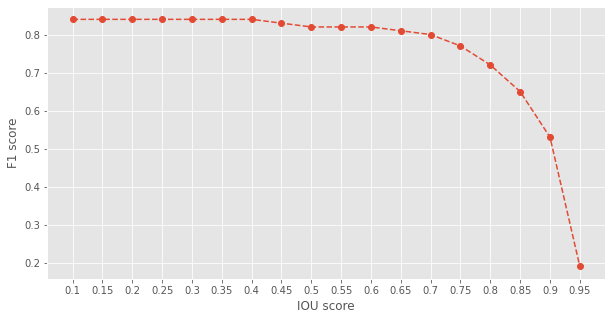

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df_allfp.iou_score, df_allfp.f1_round, '--o')
#plt.plot([0.5, 0.55], [0.841, 0.84], 'ro', label='Specific Point')
plt.ylabel('F1 score')
plt.xlabel('IOU score')
plt.savefig('')
plt.show()

## Plotly

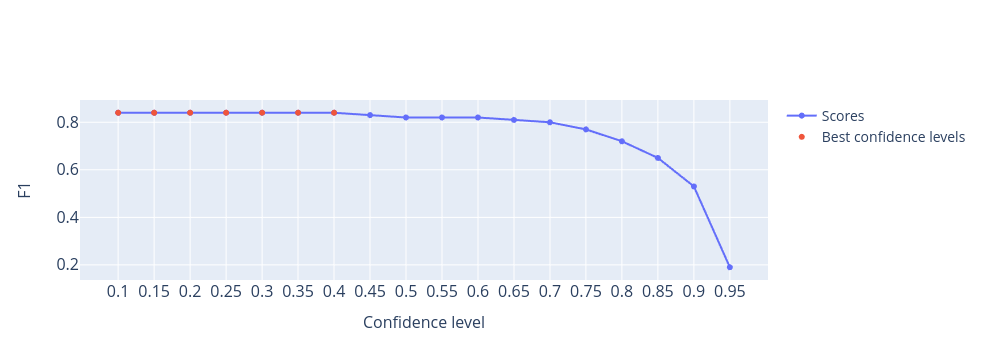

In [18]:
# Create the scatter plot with existing points
fig = go.Figure(data=go.Scatter(x=df_allfp.iou_score, 
                                y=df_allfp.f1_round, 
                                mode='markers+lines', 
                                name='Scores'))

# Add new points
fig.add_trace(go.Scatter(x=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], 
                         y=[0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84], 
                         mode='markers', 
                         name='Best confidence levels'))

# Customize layout (optional)
# fig.update_layout(title='Test to select Confidence level by best F1', 
#                   xaxis_title='Confidence level', 
#                   yaxis_title='F1')

# Customize layout
fig.update_layout(
    title='', 
    xaxis_title='Confidence level', 
    yaxis_title='F1',
    xaxis=dict(
        tickfont=dict(size=16),  # Change the font size of x-axis ticks
        title_font=dict(size=16)  # Change the font size of x-axis title
    ),
    yaxis=dict(
        tickfont=dict(size=16),  # Change the font size of y-axis ticks
        title_font=dict(size=16)  # Change the font size of y-axis title
    ),
        legend=dict(
        font=dict(size=14)  # Change the font size of legend
    )
)

# Show the plot
fig.show()

In [17]:
start = 0.1
end = 0.95
step = 0.05

numbers = [round(x, 2) for x in list(np.arange(start, end+step, step))]
print(numbers)

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
